In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline


### 1 Gradient Ascent


### 1.1 Implement The 1D GA Algorithm
1. (a) The correct location of maximization is x = 0 <br>
   (b) The gradient vector is one dimensional and it equals -2x <br>
   (c) set $x^0$ to be 1, $\nabla f(x^0) = -2 $  <br>
   (d) $x^1$ = 1+0.1*(-2) = 0.8 <br>
   (d) Yes. 

In [50]:
e = 1e-5
N = int(1e+3)
x = 10
R = 0.1

for i in range(N):
    print("Step %d" %i)
    score = -x**2
    grad = -2*x
    print("x: %10.5f, f(x): %10.5f, gradient: %10.5f" %(x, score, grad))
    if abs(grad) >= e:
        x = x+R*grad
    else:
        break
print("The solution is: %10.5f with %d steps" % (x, i))
        

Step 0
x:   10.00000, f(x): -100.00000, gradient:  -20.00000
Step 1
x:    8.00000, f(x):  -64.00000, gradient:  -16.00000
Step 2
x:    6.40000, f(x):  -40.96000, gradient:  -12.80000
Step 3
x:    5.12000, f(x):  -26.21440, gradient:  -10.24000
Step 4
x:    4.09600, f(x):  -16.77722, gradient:   -8.19200
Step 5
x:    3.27680, f(x):  -10.73742, gradient:   -6.55360
Step 6
x:    2.62144, f(x):   -6.87195, gradient:   -5.24288
Step 7
x:    2.09715, f(x):   -4.39805, gradient:   -4.19430
Step 8
x:    1.67772, f(x):   -2.81475, gradient:   -3.35544
Step 9
x:    1.34218, f(x):   -1.80144, gradient:   -2.68435
Step 10
x:    1.07374, f(x):   -1.15292, gradient:   -2.14748
Step 11
x:    0.85899, f(x):   -0.73787, gradient:   -1.71799
Step 12
x:    0.68719, f(x):   -0.47224, gradient:   -1.37439
Step 13
x:    0.54976, f(x):   -0.30223, gradient:   -1.09951
Step 14
x:    0.43980, f(x):   -0.19343, gradient:   -0.87961
Step 15
x:    0.35184, f(x):   -0.12379, gradient:   -0.70369
Step 16
x:    0.28

 Experimenting with different starting values

In [24]:
xi= [ 10, 100, 1000, 10000,100000]
steps = []
for x in xi:

    for i in range(N):
        score = -x**2
        grad = -2*x
        if abs(grad) >= e:
            x = x+R*grad
        else:
            break
    steps.append(i)

In [26]:
steps

[66, 76, 86, 96, 107]

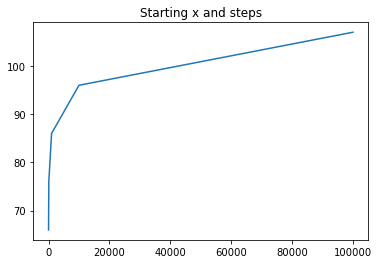

In [28]:
plt.plot(xi,steps)
plt.title("Starting x and steps")


Experimenting with different learning rates

In [41]:
e = 1e-5
N = int(1e+3)
x = 10
R = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

steps = []
for ri in R:
    e = 1e-5
    N = int(1e+3)
    x = 10
    for i in range(N):
        score = -x**2
        grad = -2*x
        if abs(grad) >= e:
            x = x+ri*grad
        else:
            break
    steps.append(i)

In [42]:
steps

[999, 999, 999, 719, 66, 999, 999]

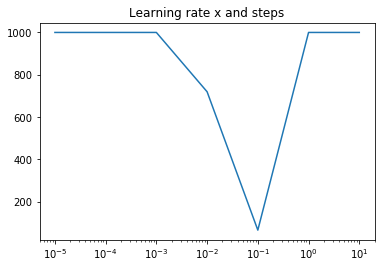

In [44]:
plt.plot(R,steps)
plt.xscale('log')
plt.title("Learning rate x and steps")

Exeprimenting with different stopping parameters

In [45]:
e = [1e-10, 1e-8, 1e-5, 1e-3, 1e-1]
N = int(1e+3)
x = 10
R = 0.1

steps = []
for ei in e:

    x = 10
    for i in range(N):
        score = -x**2
        grad = -2*x
        if abs(grad) >= ei:
            x = x+R*grad
        else:
            break
    steps.append(i)

In [46]:
steps

[117, 96, 66, 45, 24]

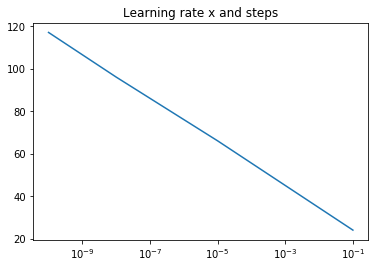

In [49]:
plt.plot(e,steps)
plt.xscale('log')
plt.title("Learning rate x and steps")

As starting point becomes further away from the maximal point, the step number grows bigger. 
When the learning rate is too small or too large, the value doesn't converge very fast. When the learning rate is too large, the value might not converge at all.
As stopping parameter becomes larger, the number of steps become smaller.

### 1.2 Implement The 2D Version

4. f(x) = $a_{11}x_1^2 + a_{22}x_2^2 + 2x_1x_2a_{12} $ <br><br>
5. When $a_{11}{22} - a_{12}a_{21} \neq 0 $, there will be a single maximum for all x. The location is $x_1 = 0$, $x_2 = 0$. <br><br>
6. $\frac{df(x)}{dx_1} = 2a_{11}x_1 + 2a_{12}x_2$<br><br>
   $\frac{df(x)}{dx_2} = 2a_{22}x_2 + 2a_{12}x_1$<br><br>

In [99]:
A = np.array([[1,2],[2,8]])
x = np.array([2, -3])
e = 1e-5
N = int(1e+3)
R = 0.1
x_trace = []
scores = []
for i in range(N):
    #print("Step %d" %i)
    x_trace.append(x)
    score = -(x.dot(A)).dot(x.T)
    scores.append(score)
    grad = -2*A.dot(x.T)
    grad_sum = sum(grad**2)
    if grad_sum >= e:
        x = x+R*grad
    else:
        break
print(i)
score_best = -(x.dot(A)).dot(x.T)
print(score_best)
print(x)
# print("The solution is: %10.5f with %d steps" % (x, i))
# x.dot(A)
# grad = -2*A.dot(x.T)
# sum(grad**2)
# x = x+0.1*grad
# x.dot(A)
# grad = -2*A.dot(x.T)
# sum(grad**2)

68
-5.23477915842e-06
[ 0.00322942 -0.00085762]


In [89]:
xs= []
ys= []

for i in x_trace:
    xs.append(i[0])
    ys.append(i[1])
    

In [91]:
len(xs)

69

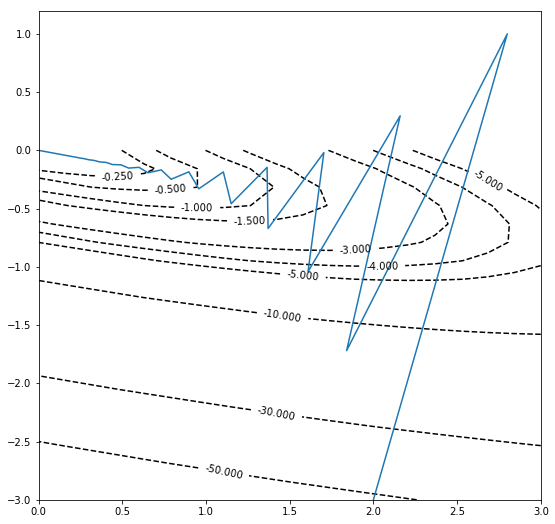

In [101]:
n = 20
ex1 = np.linspace(0., 3, num=n)
ex2 = np.linspace(0., -3, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)

z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = -(x.dot(A)).dot(x.T)

plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-50, -30, -10, -5, -4, -3, -1.5, -1, -0.5, -0.25, 0],
                colors = 'black')
plt.clabel(p, inline=1, fontsize=10)
plt.plot(xs, ys)

In [155]:
A = np.array(np.arange(1,26).reshape(5,5))
A_5 = np.eye(5)*10+1/2*(A+A.T)
x = np.array([10,20,30,40,50])
A_5

array([[ 11.,   4.,   7.,  10.,  13.],
       [  4.,  17.,  10.,  13.,  16.],
       [  7.,  10.,  23.,  16.,  19.],
       [ 10.,  13.,  16.,  29.,  22.],
       [ 13.,  16.,  19.,  22.,  35.]])

In [158]:
e = 1
N = int(1e+3)
Rs = [0.1, 0.01, 0.001, 1e-4, 1e-5,1e-6, 1e-7]
x_trace = []
scores = []

for R in Rs:
    x = np.array([10,20,30,40,50])
    for i in range(N):
        #print("Step %d" %i)
        #x_trace.append(x)
        score = -(x.dot(A_5)).dot(x.T)
        #scores.append(score)
        grad = -2*A_5.dot(x.T)
        # print(grad)
        grad_sum = sum(grad**2)
        if grad_sum >= e:
            x = x+R*grad
            #print(x)
            #print(grad_sum)
        else:
            break
    print(i)
    score_best = -(x.dot(A_5)).dot(x.T)
    print(score_best)


260
nan
58
-0.06343495706
596
-0.067595304358
999
-105.419286264
999
-17258.3225201
999
-316142.312398
999
-423513.557328


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in add


With the 4 dimensional matrix, the learning rate is the best when it's set around 0.01.When the learning rate is too big, grad value might go out of range. When the learning rate is too small, it might not converge because each step taken is too small.

With higher dimensions, it's more difficult to find the converging learning rate because there is more variability in the gradient for each parameter.

### 1.3 Condition Numbers

In [190]:
A = np.array([[1,1],[1,1]])
np.linalg.det(A)

0.0

11. The determinant of A is 0, therefore, it is singular.

In [214]:
C1 = A+100*np.eye(2)
C2 = A+1*np.eye(2)
C3 = A+0.01*np.eye(2)

eg1 = np.linalg.eig(C1)[0]
eg2 = np.linalg.eig(C2)[0]
eg3 = np.linalg.eig(C3)[0]

print(eg1)
print(eg2)
print(eg3)

CN1 = np.sqrt(max(eg1)/min(eg1))
CN2 = np.sqrt(max(eg2)/min(eg2))
CN3 = np.sqrt(max(eg3)/min(eg3))

print(CN1)
print(CN2)
print(CN3)

Cs = [C1, C2, C3]

[ 202.  200.]
[ 103.  101.]
[ 102.01  100.01]
1.00498756211
1.00985245467
1.00994950379


31
-1.23235398441e-11
[  2.28027869e-07   9.53835175e-08]


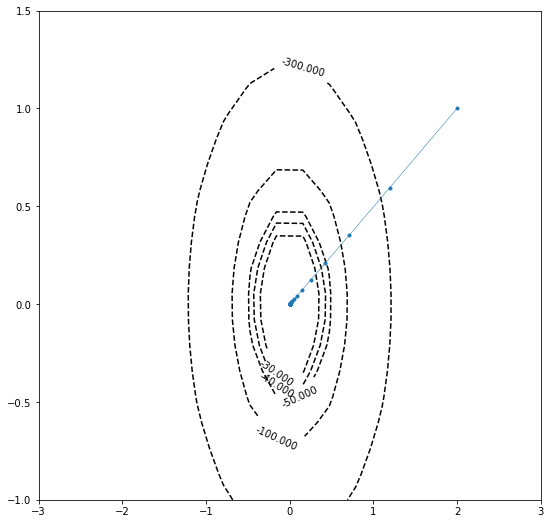

In [225]:

A = C1
x = np.array([2, 1])
e = 1e-8
N = int(1e+3)
R = 0.001
x_trace = []
scores = []
for i in range(N):
    #print("Step %d" %i)
    x_trace.append(x)
    score = -(x.dot(A)).dot(x.T)
    scores.append(score)
    grad = -2*A.dot(x.T)
    grad_sum = sum(grad**2)
    if grad_sum >= e:
        x = x+R*grad
    else:
        break
print(i)
score_best = -(x.dot(A)).dot(x.T)
print(score_best)
print(x)

Plot_Contour(A, x_trace)

In [218]:
def Plot_Contour (A, x_trace):

    xs= []
    ys= []

    for i in x_trace:
        xs.append(i[0])
        ys.append(i[1])

    n = 20
    ex1 = np.linspace(-3, 3, num=n)
    ex2 = np.linspace(1.5, -1, num=n)
    grid1, grid2 = np.meshgrid(ex1, ex2)

    z = np.empty_like(grid1)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            x = np.array([grid1[i,j], grid2[i,j]])
            z[i,j] = -(x.dot(A)).dot(x.T)

    plt.figure(figsize=(9,9))
    p = plt.contour(grid1, grid2, z,
                    levels = [-5000, -300, -100, -50, -40, -30, -1.5, -1, -0.5, -0.25, 0],
                    colors = 'black')
    plt.clabel(p, inline=1, fontsize=10)
    plt.plot(xs, ys, markersize = 3, marker='o', linewidth = 0.5)

67
-2.11878457342e-11
[  4.26997788e-07   1.55232665e-07]


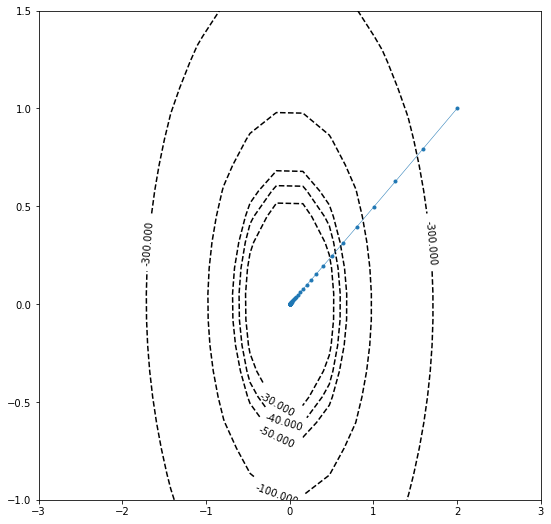

In [224]:
A = C2
x = np.array([2, 1])
e = 1e-8
N = int(1e+3)
R = 0.001
x_trace = []
scores = []
for i in range(N):
    #print("Step %d" %i)
    x_trace.append(x)
    score = -(x.dot(A)).dot(x.T)
    scores.append(score)
    grad = -2*A.dot(x.T)
    grad_sum = sum(grad**2)
    if grad_sum >= e:
        x = x+R*grad
    else:
        break
print(i)
score_best = -(x.dot(A)).dot(x.T)
print(score_best)
print(x)
Plot_Contour(A, x_trace)

68
-1.85893533455e-11
[  4.02139458e-07   1.45466092e-07]


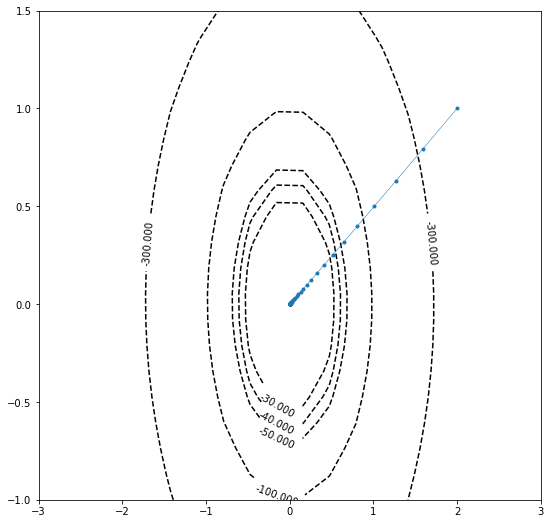

In [226]:
A = C3
x = np.array([2, 1])
e = 1e-8
N = int(1e+3)
R = 0.001
x_trace = []
scores = []
for i in range(N):
    #print("Step %d" %i)
    x_trace.append(x)
    score = -(x.dot(A)).dot(x.T)
    scores.append(score)
    grad = -2*A.dot(x.T)
    grad_sum = sum(grad**2)
    if grad_sum >= e:
        x = x+R*grad
    else:
        break
print(i)
score_best = -(x.dot(A)).dot(x.T)
print(score_best)
print(x)
Plot_Contour(A, x_trace)

The larger the condition number, the slower the convergence takes place.

### 2 OutLiers in Different Distributions